<a href="https://colab.research.google.com/github/saurabh2086/timeSeriesAnalysis/blob/prophet/DJIA_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

{}

In [4]:
# TO check whether the file has been uploaded correctly
!ls -lha kaggle.json

-rw-r--r-- 1 root root 67 Jan  1 05:23 kaggle.json


In [0]:
#install the kaggle api client
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Copy the stackoverflow data set locally.
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231

  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 101MB/s]


In [8]:
!ls -l

total 3168
-rw-r--r-- 1 root root      67 Jan  1 05:24 'kaggle (1).json'
-rw-r--r-- 1 root root      67 Jan  1 05:23  kaggle.json
drwxr-xr-x 1 root root    4096 Dec 18 20:29  sample_data
-rw-r--r-- 1 root root 3172789 Jan  1 05:25  stock-time-series-20050101-to-20171231.zip
-rw-r--r-- 1 root root   55892 Jan  1 05:23  Untitled.ipynb


In [9]:
#unzip the timeseries data
!unzip stock-time-series-20050101-to-20171231.zip

Archive:  stock-time-series-20050101-to-20171231.zip
  inflating: AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: MSFT_2006-01-01_to_2018-01-01.csv  
  inflating: AXP_2006-01-01_to_2018-01-01.csv  
  inflating: GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: INTC_2006-01-01_to_2018-01-01.csv  
  inflating: PG_2006-01-01_to_2018-01-01.csv  
  inflating: GE_2006-01-01_to_2018-01-01.csv  
  inflating: MMM_2006-01-01_to_2018-01-01.csv  
  inflating: HD_2006-01-01_to_2018-01-01.csv  
  inflating: DIS_2006-01-01_to_2018-01-01.csv  
  inflating: CAT_2006-01-01_to_2018-01-01.csv  
  inflating: JPM_2006-01-01_to_2018-01-01.csv  
  inflating: NKE_2006-01-01_to_2018-01-01.csv  
  inflating: UTX_2006-01-01_to_2018-01-01.csv  
  inflating: GS_2006-01-01_to_2018-01-01.csv  
  inflating: CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: UNH_2006-01-01_to_2018-01-01.csv  
  inflating: BA_2006-01-01_to_2018-01-01.csv  
  inflating: JNJ_2006-01-01_to_2018-01-01.csv  
  inflating: XOM_2006-01-01_to_201

In [10]:
#list the files
!ls -l *.csv

-rw-r--r-- 1 root root  148812 Jan  3  2018 AABA_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  153621 Jan  3  2018 AAPL_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root 4572477 Jan  3  2018 all_stocks_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  387663 Jan  3  2018 all_stocks_2017-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  154394 Jan  3  2018 AMZN_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  143894 Jan  3  2018 AXP_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  144922 Jan  3  2018 BA_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  145433 Jan  3  2018 CAT_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  149454 Jan  3  2018 CSCO_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  149913 Jan  3  2018 CVX_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  146325 Jan  3  2018 DIS_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  143510 Jan  3  2018 GE_2006-01-01_to_2018-01-01.csv
-rw-r--r-- 1 root root  161692 Jan  3  2018 GOOGL_2006-01-01

In [11]:
## lets check one of the files
!head -n 4 AABA_2006-01-01_to_2018-01-01.csv

Date,Open,High,Low,Close,Volume,Name
2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
2006-01-04,41.22,41.9,40.77,40.97,20553479,AABA
2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA


In [12]:
# lets check the all stocks file 
!head -n 4 all_stocks_2017-01-01_to_2018-01-01.csv

Date,Open,High,Low,Close,Volume,Name
2017-01-03,178.83,180.0,177.22,178.05,2510055,MMM
2017-01-04,178.03,178.9,177.61,178.32,1541985,MMM
2017-01-05,178.26,179.14,176.89,177.71,1447848,MMM


In [13]:
!pip install arch

    100% |████████████████████████████████| 563kB 22.4MB/s 


In [14]:
# installing prophet library from facebook for the time series analysis 
!pip install fbprophet

In [15]:
!pip install pymc

    100% |████████████████████████████████| 358kB 22.9MB/s 
  Running setup.py bdist_wheel for pymc ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/e4/6d/cf/3c408a39cf0f43e3b8abcace9758575f29c6aa860e17e9222d
Successfully built pymc


In [16]:
# it seems like the all dataset has all the stocks lets import it using the pandas library
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import scipy.stats as scs
from arch import arch_model
from fbprophet import Prophet
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
matplotlib.style.use('seaborn')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
df = pd.read_csv("all_stocks_2006-01-01_to_2018-01-01.csv", parse_dates=["Date"], index_col="Date")

In [18]:
#lets inspect the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93612 entries, 2006-01-03 to 2017-12-29
Data columns (total 6 columns):
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null int64
Name      93612 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 5.0+ MB


Most of the data is not null, there are few columns such as Open, High, and Low has missing values 
But close volume and Name is fully populated. Usually for stock analysis we focus on close prices

lets check how many stocks are present in the data

In [19]:
df.Name.nunique()

31

Lets see the name of the stocks tickers present in the data

In [20]:
df.Name.unique()

array(['MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS',
       'XOM', 'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK',
       'MSFT', 'NKE', 'PFE', 'PG', 'TRV', 'UTX', 'UNH', 'VZ', 'WMT',
       'GOOGL', 'AMZN', 'AABA'], dtype=object)

let's filter few popular stocks **Apple**, **google**, **microsoft** and **amazon**

In [0]:
dff = df[df.Name.isin(['AAPL','GOOGL','AMZN','MSFT'])]
dff_close = dff.pivot(columns="Name", values="Close")
dff_Volume = dff.pivot(columns="Name", values="Volume")

In [22]:
dff_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 4 columns):
AAPL     3019 non-null float64
AMZN     3019 non-null float64
GOOGL    3019 non-null float64
MSFT     3019 non-null float64
dtypes: float64(4)
memory usage: 117.9 KB


In [23]:
# converting data into daily frequency
dff_close.asfreq('D').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4379 entries, 2006-01-03 to 2017-12-29
Freq: D
Data columns (total 4 columns):
AAPL     3019 non-null float64
AMZN     3019 non-null float64
GOOGL    3019 non-null float64
MSFT     3019 non-null float64
dtypes: float64(4)
memory usage: 171.1 KB


there are a lot of null values, but normaly the exchanges remain close on weekends, so let's remove it from the data

In [24]:
# changing frequency to business days
dff_close = dff_close.asfreq('B')
dff_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3129 entries, 2006-01-03 to 2017-12-29
Freq: B
Data columns (total 4 columns):
AAPL     3019 non-null float64
AMZN     3019 non-null float64
GOOGL    3019 non-null float64
MSFT     3019 non-null float64
dtypes: float64(4)
memory usage: 122.2 KB


still there are few entries that are null let's check what are those

In [25]:
dff_close[dff_close.AAPL.isnull()].tail()

Name,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2017-05-29,NaN,NaN,NaN,NaN
2017-07-04,NaN,NaN,NaN,NaN
2017-09-04,NaN,NaN,NaN,NaN
2017-11-23,NaN,NaN,NaN,NaN
2017-12-25,NaN,NaN,NaN,NaN


After checking with calander these date fall on public holidays

lets remove all the NaN values for our analysis. 

In [26]:
dff_close.dropna(inplace=True)
dff_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2006-01-03 to 2017-12-29
Data columns (total 4 columns):
AAPL     3019 non-null float64
AMZN     3019 non-null float64
GOOGL    3019 non-null float64
MSFT     3019 non-null float64
dtypes: float64(4)
memory usage: 117.9 KB


Lets do a line plot to visualize our data

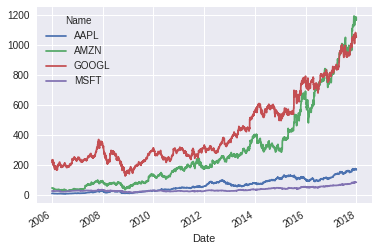

In [27]:
dff_close.plot()
plt.show()

By this graph looks like **Google** and **Amazon**  have given more return, but it is an illusion since the starting prices for these values were different we can not really compare these stocks. Lets regularize this series and devide it by first observation

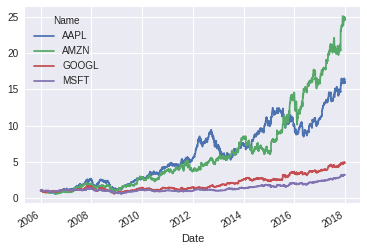

In [28]:
dff_close_norm = dff_close.divide(dff_close.iloc[0,:])
dff_close_norm.plot()
plt.show()

Whoa !!, Now this shows the correct story stoks of **Apple** and **Amazon** have increasd much more than the Google.

We use mostly **statsmodel** and **prophet** library for the time series analysis.

Lets analyze the stock of Apple 

In [0]:
df_aapl = dff_close[['AAPL']].reset_index()
df_aapl.columns = ["ds","y"]




In [0]:
df_aapl["log_y"] = np.log(df_aapl["y"])
df_aapl["daily_change"] = df_aapl[["y"]].diff()
df_aapl["daily_perc_change"] = df_aapl[["y"]].pct_change()
df_aapl["log_returns"] = 100*np.log(df_aapl["y"]/df_aapl["y"].shift(1))

In [31]:
df_aapl.head()

,ds,y,log_y,daily_change,daily_perc_change,log_returns
0,2006-01-03,10.68,2.368373,NaN,NaN,NaN
1,2006-01-04,10.71,2.371178,0.03,0.002809,0.280505
2,2006-01-05,10.63,2.363680,-0.08,-0.007470,-0.749769
3,2006-01-06,10.90,2.388763,0.27,0.025400,2.508260
4,2006-01-09,10.86,2.385086,-0.04,-0.003670,-0.367647


Lets plot the percentage change

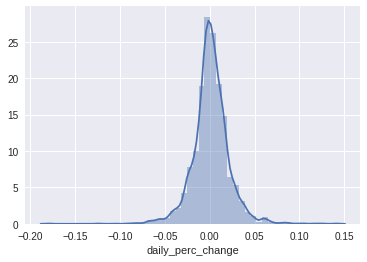

In [32]:
sns.distplot(df_aapl.daily_perc_change.dropna())
plt.show()

In [33]:
from statsmodels.stats.weightstats import DescrStatsW
print(DescrStatsW(df_aapl['daily_perc_change'].dropna()).ttest_mean(value=0, alternative='two-sided'))
print(DescrStatsW(df_aapl['daily_perc_change'].dropna()).tconfint_mean())


(3.0253288986341422, 0.002504578301407265, 3017.0)
(0.0003957288069114663, 0.0018534430815421183)


From 5%  confidance interval we rejected the hypothesis that the mean return is zero 

Lets plot the daily change in price and pct change 


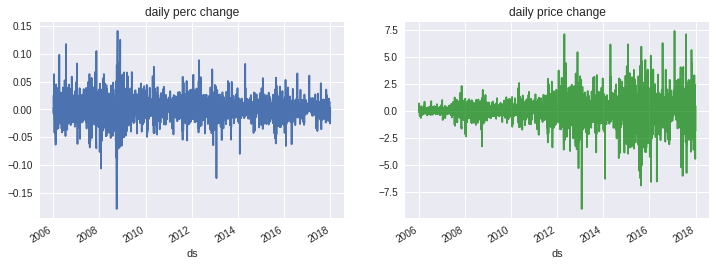

In [35]:
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
df_aapl.set_index("ds")["daily_perc_change"].plot(ax=ax[0])
df_aapl.set_index("ds")["daily_change"].plot(ax=ax[1], color='g', alpha=0.7)
ax[0].set_title("daily perc change")
ax[1].set_title("daily price change")
plt.show()


By observing these two graphs we can see that both the data does not look stationary(one of the most important concept in time series analysis).
The trend has got removed by the first difference but the variance does not look constant across the whole time line.

1.   In the first graph the variance is fluctuating and during the **2006** and **2009** period it looks higher than previous periods
2.   In the second graph the trend looks reversed initally hte change is not much but later the magnitude of changes increased. 

The opposite trend might be due to change in base price



We have to work on making the series stationary. There are few things we can do is like taking log /square root of the initial series or the of the first difference values.

Taking log returns of the series

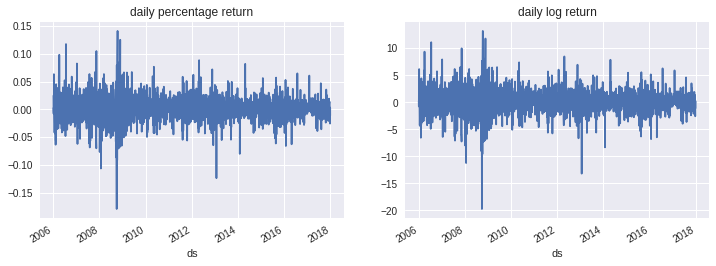

In [36]:
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2,)
df_aapl.set_index("ds")["daily_perc_change"].plot(ax=ax[0])
df_aapl.set_index("ds")["log_returns"].plot(ax=ax[1])
ax[1].set_title("daily log return")
ax[0].set_title("daily percentage return")
plt.show()


Lets try taking the log of the series and see if things change 

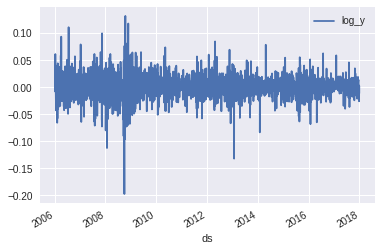

In [37]:
df_aapl.set_index("ds")[["log_y"]].diff().plot()
plt.show()

taking log does not solve the issue of changing variance. We can plot the time series along with the **ACF**(auto correlation), **PACF**(partial autocorrelation) and distribution 

In [38]:
df_aapl = df_aapl.dropna()
df_aapl.index = df_aapl.ds
df_aapl.head()

,ds,y,log_y,daily_change,daily_perc_change,log_returns
ds,,,,,,
2006-01-04,2006-01-04,10.71,2.371178,0.03,0.002809,0.280505
2006-01-05,2006-01-05,10.63,2.363680,-0.08,-0.007470,-0.749769
2006-01-06,2006-01-06,10.90,2.388763,0.27,0.025400,2.508260
2006-01-09,2006-01-09,10.86,2.385086,-0.04,-0.003670,-0.367647
2006-01-10,2006-01-10,11.55,2.446685,0.69,0.063536,6.159912


lets select a sample of last 3 years of data, since the most recent change in prices are more dependent on the recent year prices.

In [0]:
samp = df_aapl.loc['2014':'2017']

In [0]:
def plot_timeseries(y):
  fig = plt.figure(figsize=(15,10))
  layout = (3,2)
  ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
  acf_ax = plt.subplot2grid(layout, (1, 0))
  pacf_ax = plt.subplot2grid(layout, (1, 1))
  qq_ax = plt.subplot2grid(layout, (2, 0))
  pp_ax = plt.subplot2grid(layout, (2, 1))
  y.plot(ax=ts_ax)
  ts_ax.set_title('Time Series Analysis Plots')
  plot_acf(y,lags=50,ax=acf_ax)
  plot_pacf(y, lags=50,ax=pacf_ax)
  acf_ax.set_xlim(0.5)
  pacf_ax.set_xlim(0.5)
  sm.qqplot(y, line='s', ax=qq_ax)
  qq_ax.set_title('QQ Plot')
  scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
  plt.tight_layout()
  plt.show()
  

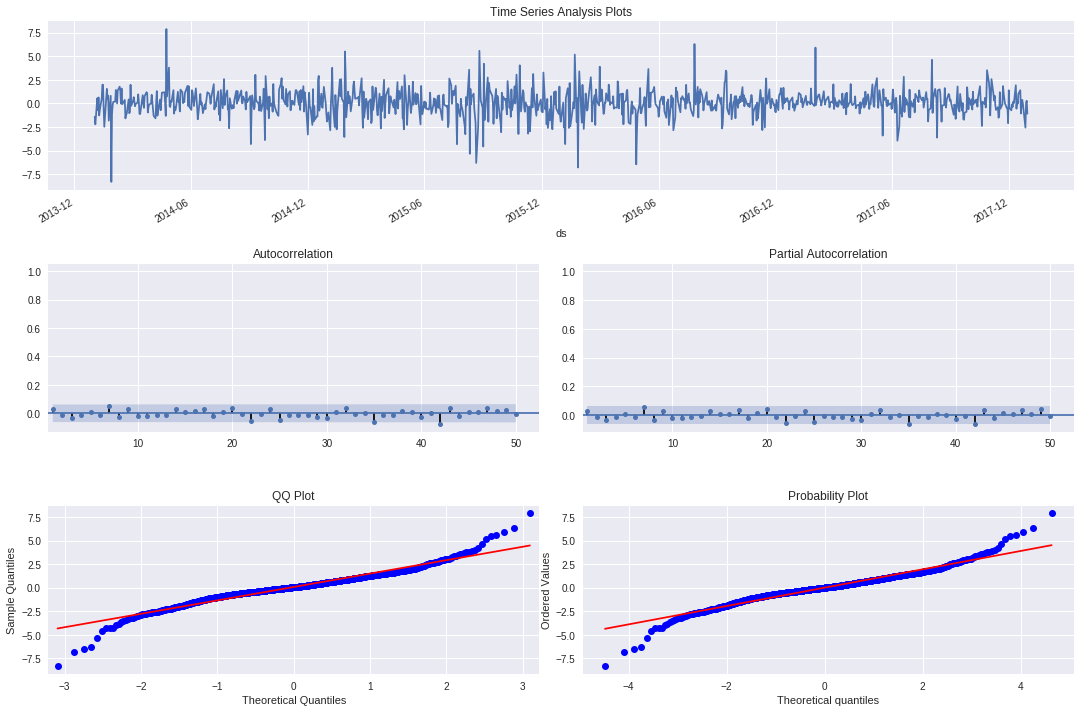

In [41]:
plot_timeseries(samp.log_returns)

plotting the square of daily log returns 

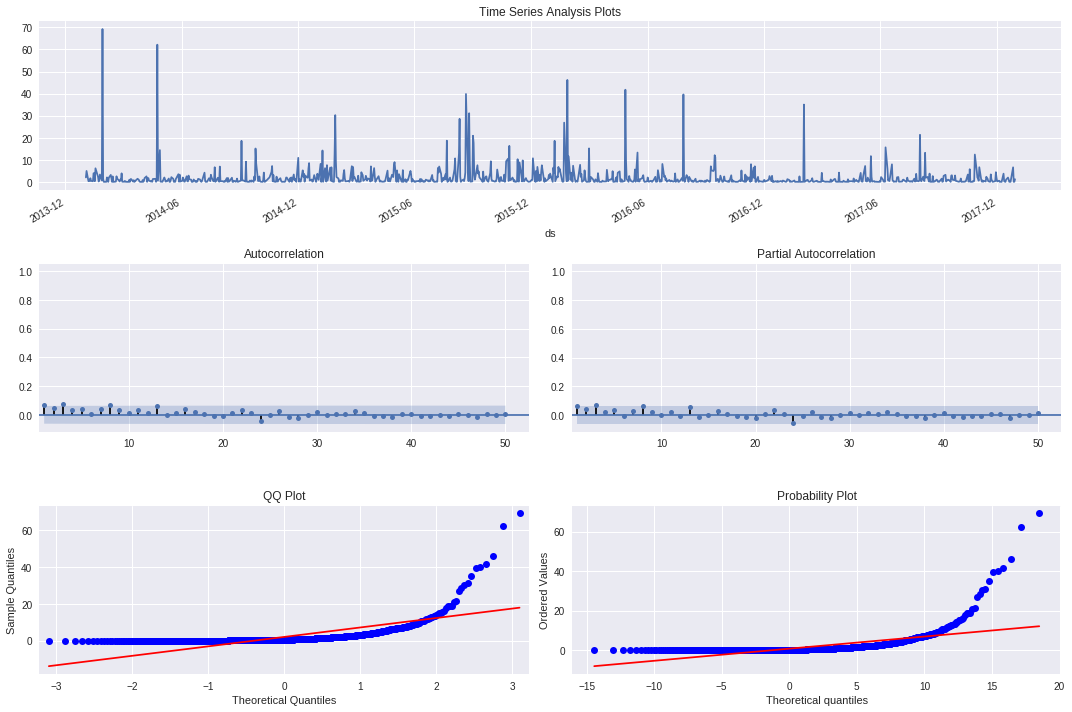

In [42]:
plot_timeseries(samp.log_returns**2)

in both cases it looks like the variance and returns are not correlated seems to follow a random process and is white noise 

By lookig at this graph is looks like the returns are white noise since the ACF and PACF are not significantly different than zero.
The qq plot also shows that that the distribution is some waht closer to normal distribution




Lets check whether the process is random walk or not 

In [47]:
# Augmented Dickey-Fuller test on price of aapl stocks 
adf = adfuller(samp["y"])
print("p-value of aapl: {}".format(float(adf[1])))

p-value of aapl: 0.8868361464227543


SInce the p value is not less than 0.05 we cannot reject the null hypothesis that the return is a random walk

Lets check another period such as 2007 to 2009

In [0]:
samp2 = df_aapl['2007':'2009']

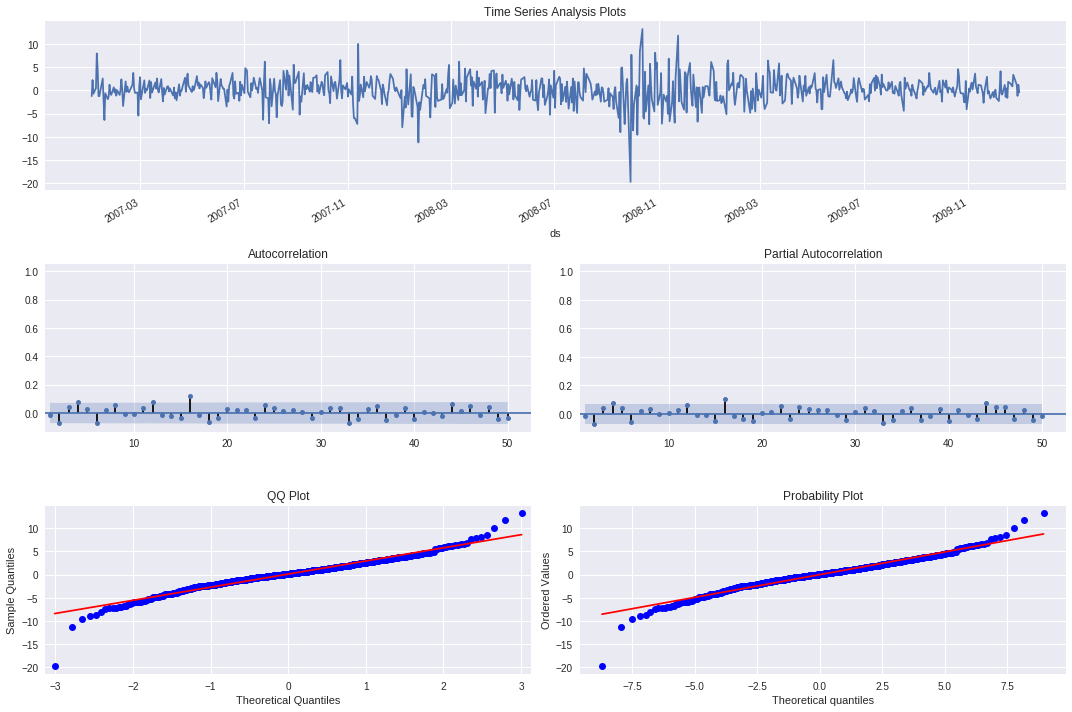

In [45]:
plot_timeseries(samp2.log_returns)

The process looks random, since the mean and ACF and PACF does not give any direction towards modelling

In [48]:
# Augmented Dickey-Fuller test on price of aapl stocks 
adf = adfuller(samp2["y"])
print("p-value of aapl: {}".format(float(adf[1])))

p-value of aapl: 0.6787903355225113


again the augmented dickey-fuller test shows that we can not reject the null hypothesis that the pattern is just a random walk

Lets see how many days in typical year

In [46]:
samp.loc['2014'].shape

(252, 6)

# Trading Strategy

lets create a trading stategy by taking a 252 days time window and create a GRACH model to find the trading strategy

The idea of this strategy is as below:

For each day, , use differenced logarithmic returnsfor the previous  days to fit an optimal ARIMA and GARCH model
1. Use the combined model to make a prediction for the next day returns
2. If the prediction is positive, go long the stock and if negative, short the stock at  day's close
3. If the prediction is the same as the previous day then do nothing

In [0]:
window = 252
fore_length = len(samp.log_returns) - window

In [0]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    pq_rng = range(1,4) # [1,2,3]
    for i in pq_rng:
            for j in pq_rng:
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,0,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, 0, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: %6.5f | order: %s'%(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [51]:
fore_length

755

In [56]:
signal = 0*samp.log_returns.iloc[-fore_length:]
for d in range(fore_length):
    # create a rolling window by selecting the values between 1+d and k+d of S&P500 returns
    TS = samp.log_returns.iloc[(1+d):(window+d)] 
    # Find the best ARIMA fit (we set differencing to 0 since we've already differenced the series once)
    res_tup = _get_best_model(TS)
    order = res_tup[1]
    model = res_tup[2]
    #now that we have our ARIMA fit, we feed this to GARCH model
    p_ = order[0]
    o_ = order[1]
    q_ = order[2]

    am = arch_model(model.resid, p=p_, o=o_, q=q_, dist='StudentsT')
    res = am.fit(update_freq=5, disp='off')
    out = res.forecast(horizon=1, start=None, align='origin')
    signal.iloc[d] = np.sign(out.mean['h.1'].iloc[-1])

aic: 870.90376 | order: (2, 0, 2)
aic: 873.20496 | order: (2, 0, 1)
aic: 876.94609 | order: (2, 0, 1)
aic: 876.73908 | order: (2, 0, 1)
aic: 877.85958 | order: (2, 0, 1)
aic: 883.69410 | order: (2, 0, 2)
aic: 883.34662 | order: (2, 0, 2)
aic: 887.44019 | order: (2, 0, 1)
aic: 886.36052 | order: (2, 0, 2)
aic: 883.81485 | order: (2, 0, 1)
aic: 884.67485 | order: (2, 0, 2)
aic: 884.77756 | order: (2, 0, 1)
aic: 887.71144 | order: (2, 0, 1)
aic: 887.72094 | order: (2, 0, 1)
aic: 890.28386 | order: (2, 0, 1)
aic: 887.62138 | order: (1, 0, 1)
aic: 886.45625 | order: (1, 0, 1)
aic: 856.69922 | order: (2, 0, 2)
aic: 875.31218 | order: (2, 0, 1)
aic: 878.36473 | order: (1, 0, 1)
aic: 879.89191 | order: (1, 0, 1)
aic: 880.65878 | order: (1, 0, 1)
aic: 879.67231 | order: (1, 0, 1)
aic: 879.69166 | order: (1, 0, 1)
aic: 879.72422 | order: (1, 0, 1)
aic: 879.24800 | order: (1, 0, 1)
aic: 877.91448 | order: (1, 0, 1)
aic: 878.91371 | order: (1, 0, 1)
aic: 881.41193 | order: (2, 0, 1)
aic: 880.89167

In [57]:
signal.value_counts()

 1.0    577
-1.0    178
Name: log_returns, dtype: int64

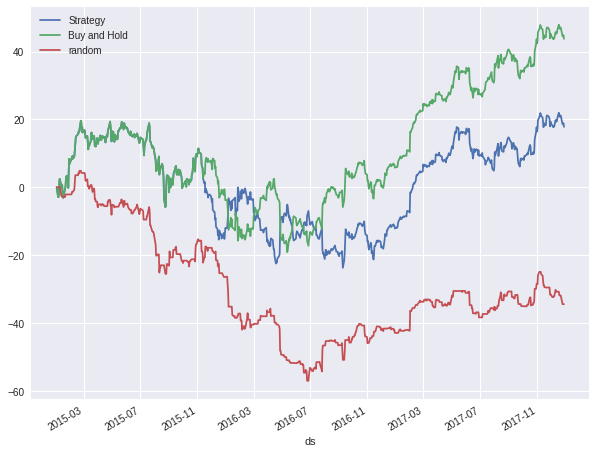

In [58]:
rets = pd.DataFrame(index = signal.index, columns=['Buy and Hold', 'Strategy', 'random'])
eqCurves = pd.DataFrame(index = signal.index, columns=['Buy and Hold', 'Strategy', 'random'])
rets['Buy and Hold'] = samp.log_returns[-fore_length:]
rets['random'] = np.random.random_integers(0, 1, fore_length)

rets['Strategy'] = signal
rets['Strategy'] = rets['Strategy']*rets['Buy and Hold']
rets['random'] = rets['random']*rets['Buy and Hold']
eqCurves['Buy and Hold']=(rets['Buy and Hold']+1).cumprod()-1
eqCurves['Strategy'] = rets['Strategy'].cumsum()+1
eqCurves['random'] = rets['random'].cumsum()+1
eqCurves['Strategy'].plot(figsize=(10,8))
eqCurves['Buy and Hold'].plot()
eqCurves['random'].plot()
plt.legend()
plt.show()


## Let's model the trading strategy it on log returns

In [59]:
signal = 0*samp.log_returns.iloc[-fore_length:]
for d in range(fore_length):
    # create a rolling window by selecting the values between 1+d and k+d of S&P500 returns
    TS = samp.log_returns.iloc[(1+d):(window+d)] 
    # Find the best ARIMA fit (we set differencing to 0 since we've already differenced the series once)
    res_tup = _get_best_model(TS)
    order = res_tup[1]
    model = res_tup[2]
    #now that we have our ARIMA fit, we feed this to GARCH model
    p_ = order[0]
    o_ = order[1]
    q_ = order[2]

    am = arch_model(samp.log_returns, p=p_, o=o_, q=q_, dist='StudentsT')
    res = am.fit(update_freq=5, disp='off')
    out = res.forecast(horizon=1, start=None, align='origin')
    signal.iloc[d] = np.sign(out.mean['h.1'].iloc[-1])

aic: 870.90376 | order: (2, 0, 2)
aic: 873.20496 | order: (2, 0, 1)
aic: 876.94609 | order: (2, 0, 1)
aic: 876.73908 | order: (2, 0, 1)
aic: 877.85958 | order: (2, 0, 1)
aic: 883.69410 | order: (2, 0, 2)
aic: 883.34662 | order: (2, 0, 2)
aic: 887.44019 | order: (2, 0, 1)
aic: 886.36052 | order: (2, 0, 2)
aic: 883.81485 | order: (2, 0, 1)
aic: 884.67485 | order: (2, 0, 2)
aic: 884.77756 | order: (2, 0, 1)
aic: 887.71144 | order: (2, 0, 1)
aic: 887.72094 | order: (2, 0, 1)
aic: 890.28386 | order: (2, 0, 1)
aic: 887.62138 | order: (1, 0, 1)
aic: 886.45625 | order: (1, 0, 1)
aic: 856.69922 | order: (2, 0, 2)
aic: 875.31218 | order: (2, 0, 1)
aic: 878.36473 | order: (1, 0, 1)
aic: 879.89191 | order: (1, 0, 1)
aic: 880.65878 | order: (1, 0, 1)
aic: 879.67231 | order: (1, 0, 1)
aic: 879.69166 | order: (1, 0, 1)
aic: 879.72422 | order: (1, 0, 1)
aic: 879.24800 | order: (1, 0, 1)
aic: 877.91448 | order: (1, 0, 1)
aic: 878.91371 | order: (1, 0, 1)
aic: 881.41193 | order: (2, 0, 1)
aic: 880.89167

In [64]:
signal.value_counts()

1.0    755
Name: log_returns, dtype: int64

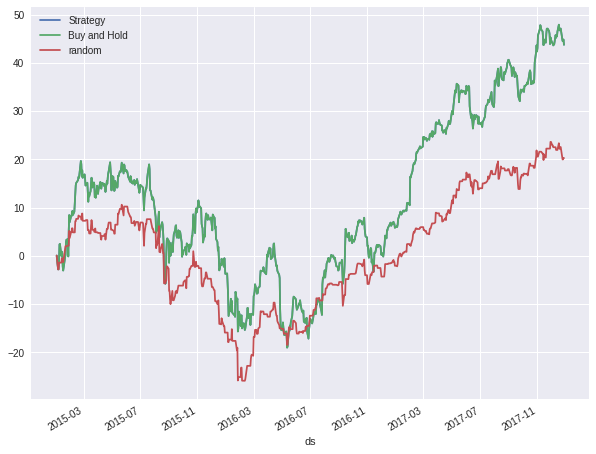

In [67]:
rets = pd.DataFrame(index = signal.index, columns=['Buy and Hold', 'Strategy', 'random'])
eqCurves = pd.DataFrame(index = signal.index, columns=['Buy and Hold', 'Strategy', 'random'])
rets['Buy and Hold'] = samp.log_returns[-fore_length:]
rets['random'] = np.random.random_integers(0, 1, fore_length)
rets['Strategy'] = signal
rets['Strategy'] = rets['Strategy']*rets['Buy and Hold']
rets['random'] = rets['random']*rets['Buy and Hold']
eqCurves['Buy and Hold']=rets['Buy and Hold'].cumsum()+1
eqCurves['Strategy'] = rets['Strategy'].cumsum()+1
eqCurves['random'] = rets['random'].cumsum()+1
eqCurves['Strategy'].plot(figsize=(10,8))
eqCurves['Buy and Hold'].plot()
eqCurves['random'].plot()
plt.legend()
plt.show()


We have four companies - AAPL, AMZN, GOOGL, MSFT

What do you think the return profile looks like for each of these companies?

In [36]:
dff_close.head()

Name,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2006-01-03,10.68,47.58,217.83,26.84
2006-01-04,10.71,47.25,222.84,26.97
2006-01-05,10.63,47.65,225.85,26.99
2006-01-06,10.90,47.87,233.06,26.91
2006-01-09,10.86,47.08,233.68,26.86


Lets calculate the percentage return of these companies

In [37]:

df_return = dff_close.pct_change().fillna(0)
df_return.head()

Name,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2006-01-03,0.000000,0.000000,0.000000,0.000000
2006-01-04,0.002809,-0.006936,0.023000,0.004844
2006-01-05,-0.007470,0.008466,0.013507,0.000742
2006-01-06,0.025400,0.004617,0.031924,-0.002964
2006-01-09,-0.003670,-0.016503,0.002660,-0.001858


In [38]:
# lets take a sample of last 5 years

samp = df_return.loc['2013':'2017']
samp.iloc[0] = 0.
samp.shape

(1259, 4)

In [39]:
samp.iloc[-252:,:].describe()

Name,AAPL,AMZN,GOOGL,MSFT
count,252.000000,252.000000,252.000000,252.000000
mean,0.001536,0.001770,0.001125,0.001264
std,0.011128,0.013252,0.009651,0.009340
min,-0.038777,-0.035419,-0.034014,-0.037740
25%,-0.003974,-0.004036,-0.004054,-0.003417
50%,0.000579,0.001417,0.001503,0.000555
75%,0.006358,0.008547,0.006057,0.006426
max,0.060981,0.132164,0.042616,0.064119


In [40]:
# take priors from previous sample
samp_prev = df_return.loc['2006':'2012']
samp_prev.shape

(1760, 4)

In [41]:
samp_prev.describe()

Name,AAPL,AMZN,GOOGL,MSFT
count,1760.000000,1760.000000,1760.000000,1760.000000
mean,0.001392,0.001362,0.000498,0.000171
std,0.023517,0.029153,0.021149,0.018712
min,-0.179039,-0.218220,-0.116112,-0.117131
25%,-0.010786,-0.012818,-0.008923,-0.008594
50%,0.001059,-0.000368,0.000202,0.000000
75%,0.013807,0.014253,0.010214,0.008715
max,0.141304,0.269497,0.199920,0.186047


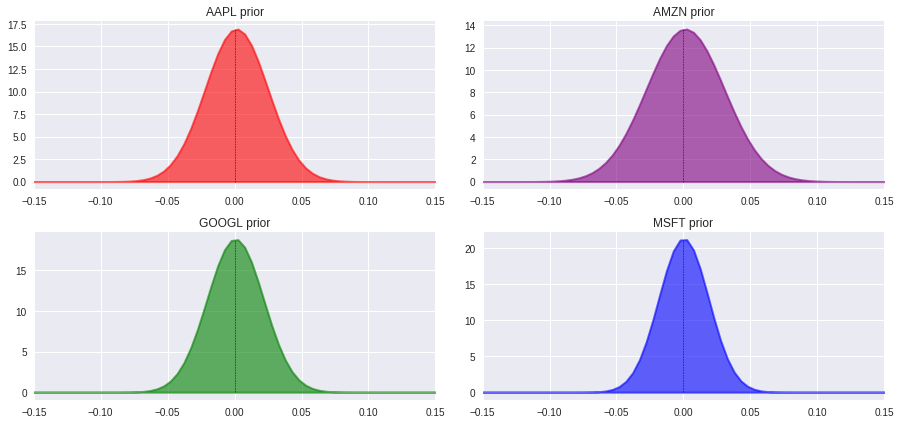

In [42]:
# lets set priors of these stocks
stock_prior = {'AAPL': (0.001393, 0.023524),
               'AMZN': (0.001362, 0.029162),
               'GOOGL': (0.000498, 0.021155),
               'MSFT': (0.000172, 0.018717) 
              }
normal = stats.norm
x = np.linspace(-0.25, 0.25, 100)
fig,ax = plt.subplots(figsize=(12.5, 6))
colors = ['red', 'purple', 'green', 'blue']
for i, (name, params) in enumerate(stock_prior.items()):
    plt.subplot(2, 2, i + 1)
    y = normal.pdf(x, params[0], scale=params[1])
    #plt.plot( x, y, c = colors[i] )
    plt.fill_between(x, 0, y, color=colors[i], linewidth=2,
                     edgecolor=colors[i], alpha=0.6)
    plt.title(name + " prior")
    plt.vlines(0, 0, y.max(), "k", "--", linewidth=0.5)
    plt.xlim(-0.15, 0.15)
plt.tight_layout()

In order to better model these returns, we should investigate the covariance matrix of the returns. 

For example, it would be unwise to invest in two stocks that are highly correlated, since they are likely to tank together (hence why fund managers suggest a diversification strategy). 

We will use the Wishart distribution for this

In [0]:
import pymc as pm

n_observations = 504  # we will truncate the the most recent 1 year.

prior_mu = np.array([x[0] for x in stock_prior.values()])
prior_std = np.array([x[1] for x in stock_prior.values()])

inv_cov_matrix = pm.Wishart("inv_cov_matrix", n_observations, np.diag(prior_std ** 2))
mu = pm.Normal("returns", prior_mu, 1, size=4)

In [31]:
prior_mu

array([0.001393, 0.001362, 0.000498, 0.000172])

In [32]:
prior_std

array([0.023524, 0.029162, 0.021155, 0.018717])

In [43]:
samp_ = samp.add(1).cumprod().subtract(1)
samp_.head()

Name,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2013-01-02,0.000000,0.000000,0.000000,0.000000
2013-01-03,-0.012623,0.004547,0.000580,-0.013396
2013-01-04,-0.040036,0.007151,0.020332,-0.031861
2013-01-07,-0.046283,0.043333,0.015884,-0.033671
2013-01-08,-0.043223,0.035249,0.013895,-0.038740


In [0]:
stock_returns = np.zeros((n_observations, 4))

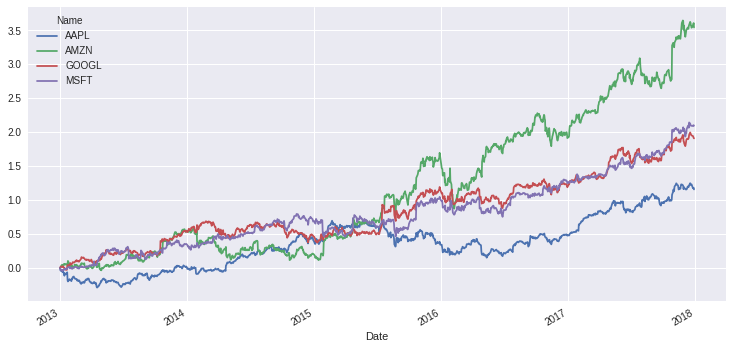

In [45]:
fig, ax = plt.subplots(figsize=(12.5, 6))

samp_.plot(ax=ax)
plt.show()

Lets plot histogram of all the returns

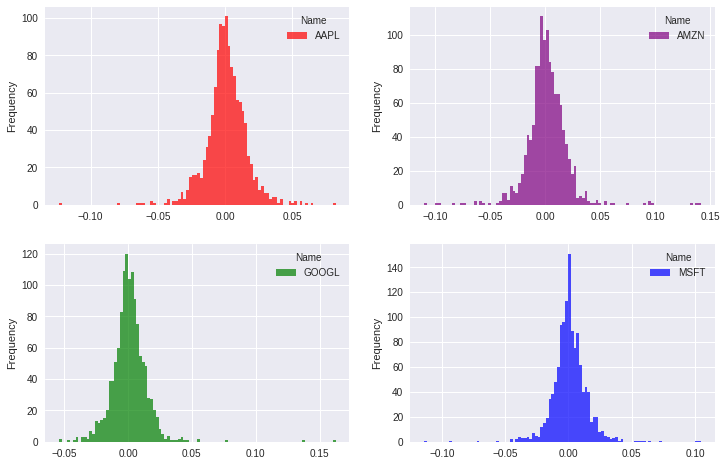

In [46]:
fig, ax = plt.subplots(figsize=(12, 8), nrows=2, ncols=2)
samp[['AAPL']].plot.hist(color=colors[0], ax=ax[0][0],alpha=0.7, bins=100)
samp[['AMZN']].plot.hist(color=colors[1], ax=ax[0][1],alpha=0.7, bins=100)
samp[['GOOGL']].plot.hist(color=colors[2], ax=ax[1][0],alpha=0.7, bins=100)
samp[['MSFT']].plot.hist(color=colors[3], ax=ax[1][1],alpha=0.7, bins=100)
plt.show()

Below we perform the inference on the posterior mean return and posterior covariance matrix.

In [47]:
stock_returns = samp.iloc[-n_observations:,:].values
stock_returns.shape

(504, 4)

In [0]:
obs = pm.MvNormal("observed returns", mu, inv_cov_matrix, observed=True, value=stock_returns)

model = pm.Model([obs, mu, inv_cov_matrix])
mcmc = pm.MCMC()

# mcmc.sample(150000, 100000, 3)

In [49]:
mcmc.sample(150000, 100000, 3)

 [-----------------100%-----------------] 150000 of 150000 complete in 227.4 sec

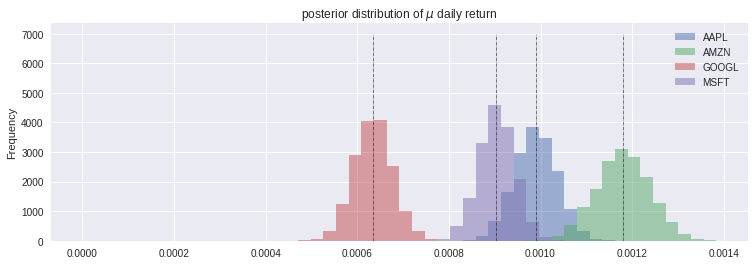

In [50]:
fig, ax = plt.subplots(figsize=(12.5, 4))
mean_returns = mcmc.trace("returns")[:]

mu_samples = pd.DataFrame(mean_returns)
mu_samples.columns = ["AAPL", "AMZN","GOOGL", "MSFT"]

mu_samples.plot.hist(ax=ax, bins=50, alpha= 0.5)
ax.vlines(mu_samples.mean(axis=0), 0, 7000, linestyle="-.", linewidth=0.5)
ax.set_title("posterior distribution of $\mu$ daily return ")
plt.show()

In [52]:
mu_samples.describe().loc['mean']

AAPL     0.000989
AMZN     0.001180
GOOGL    0.000634
MSFT     0.000904
Name: mean, dtype: float64

Based on last 2 years of data it loks like AMZN has better mean return than other stocks. But the over all mean return is still very close to zero.

Below we show the posterior correlation matrix, and posterior standard deviations. An important caveat to know is that the Wishart distribution models the inverse covariance matrix, so we must invert it to get the covariance matrix. We also normalize the matrix to acquire the correlation matrix.

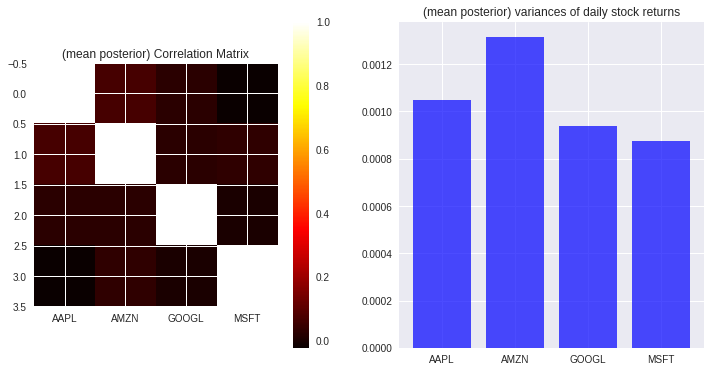

In [78]:
inv_cov_samples = mcmc.trace("inv_cov_matrix")[:]
mean_covariance_matrix = np.linalg.inv(inv_cov_samples.mean(axis=0))

def cov_to_corr(A):
    """
    covariance matrix to correlation matrix.
    """
    d = np.sqrt(A.diagonal())
    A = ((A.T / d).T) / d
    return A
  
fig, ax = plt.subplots(figsize=(12, 6), nrows=1, ncols=2)
im = ax[0].imshow(cov_to_corr(mean_covariance_matrix), interpolation="none",cmap=plt.cm.hot)
ax[0].set_xticks(np.arange(4))
ax[0].set_xticklabels(stock_prior.keys())
fig.colorbar(im, ax=ax[0])
ax[0].set_title("(mean posterior) Correlation Matrix")
ax[1].bar(np.arange(4), np.sqrt(np.diag(mean_covariance_matrix)),color="blue", alpha=0.7)
ax[1].set_title("(mean posterior) variances of daily stock returns")
ax[1].set_xticks(np.arange(4))
ax[1].set_xticklabels(stock_prior.keys())
plt.show()

Looking at the graph it seems like there is a very little correlation exists among the stock returns. so these may be used for our diversification strategies . Standard deviation of the amazon is higher than other stocks

## Forcasting using prophet model

In [0]:
import pandas as pd
from fbprophet import Prophet

we have taken sample of 5 years and kept one year to forcast and use it to check the model

In [90]:
samp = dff_close.loc['2012':'2016']
samp.head()

Name,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2012-01-03,58.75,179.03,333.04,26.76
2012-01-04,59.06,177.51,334.47,27.40
2012-01-05,59.72,177.61,329.83,27.68
2012-01-06,60.34,182.61,325.34,28.10
2012-01-09,60.25,178.56,311.54,27.74


SInce in our last model AMZN was one of the most volatile and high performance stock lets analyze it more

In [91]:
df_amzn = samp[['AMZN']]
df_amzn['ds'] = df_amzn.index
df_amzn.columns = ['y', 'ds']
df_amzn.head()

,y,ds
Date,,
2012-01-03,179.03,2012-01-03
2012-01-04,177.51,2012-01-04
2012-01-05,177.61,2012-01-05
2012-01-06,182.61,2012-01-06
2012-01-09,178.56,2012-01-09


In [92]:
m = Prophet()
m.fit(df_amzn)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

In [94]:
# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1618,2017-12-26,1011.065756,927.559849,1091.216860
1619,2017-12-27,1010.435428,920.381900,1090.256951
1620,2017-12-28,1011.153642,922.088019,1088.058947
1621,2017-12-29,1010.959411,924.131284,1088.831008
1622,2017-12-30,1001.151741,910.086614,1082.225352


In [95]:
forecast.index = forecast.ds
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
ds,,,,,,,,,,,,,,,,,,,
2012-01-03,2012-01-03,192.435083,192.435083,192.435083,164.681482,237.264550,7.241381,7.241381,7.241381,0.0,0.0,0.0,2.932469,2.932469,2.932469,4.308911,4.308911,4.308911,199.676464
2012-01-04,2012-01-04,192.591968,192.591968,192.591968,160.135738,233.662356,6.184419,6.184419,6.184419,0.0,0.0,0.0,2.319187,2.319187,2.319187,3.865231,3.865231,3.865231,198.776386
2012-01-05,2012-01-05,192.748852,192.748852,192.748852,163.174741,233.879014,6.468476,6.468476,6.468476,0.0,0.0,0.0,3.037911,3.037911,3.037911,3.430565,3.430565,3.430565,199.217328
2012-01-06,2012-01-06,192.905737,192.905737,192.905737,163.503901,232.440580,5.827844,5.827844,5.827844,0.0,0.0,0.0,2.826552,2.826552,2.826552,3.001292,3.001292,3.001292,198.733581
2012-01-09,2012-01-09,193.376390,193.376390,193.376390,163.493973,232.017652,4.619775,4.619775,4.619775,0.0,0.0,0.0,2.916600,2.916600,2.916600,1.703175,1.703175,1.703175,197.996165


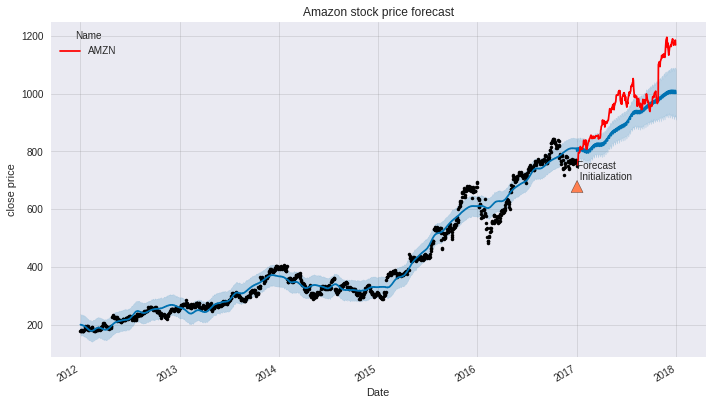

In [96]:
import matplotlib.dates as mdates
import datetime as dt
pointing_arrow = dt.datetime(2017, 1, 1)
pointing_arrow1 = mdates.date2num(pointing_arrow)
starting_date = dt.datetime(2017, 1, 1)
starting_date1 = mdates.date2num(starting_date)

fig=m.plot(forecast,)
ax1 = fig.add_subplot(111)
ax1.set_title("Amazon stock price forecast")
ax1.set_ylabel("close price")

dff_close[['AMZN']].loc['2017'].plot(ax=ax1,color='r')
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 700), xytext=(starting_date1,700),
             arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )
plt.show()

Lets analyse the plot components , trend, yearly seasonality, weekly seasonality



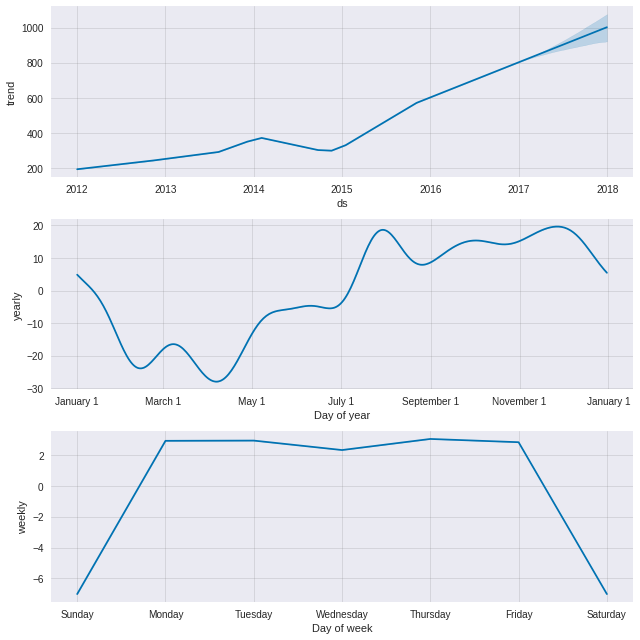

In [97]:
m.plot_components(forecast)
plt.show()

Lets add automatic change points in the time series 

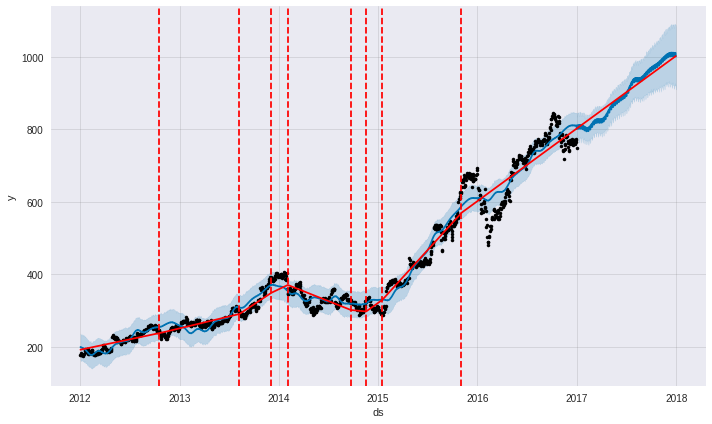

In [98]:
from fbprophet.plot import add_changepoints_to_plot 
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m , forecast)

# Trading strategy using prophet model


In [99]:
samp = dff_close.loc['2012':]
samp.head()

Name,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2012-01-03,58.75,179.03,333.04,26.76
2012-01-04,59.06,177.51,334.47,27.40
2012-01-05,59.72,177.61,329.83,27.68
2012-01-06,60.34,182.61,325.34,28.10
2012-01-09,60.25,178.56,311.54,27.74


In [100]:
df_amzn = samp[['AMZN']]
df_amzn['ds'] = df_amzn.index
df_amzn.columns = ['y', 'ds']
df_amzn.head()

,y,ds
Date,,
2012-01-03,179.03,2012-01-03
2012-01-04,177.51,2012-01-04
2012-01-05,177.61,2012-01-05
2012-01-06,182.61,2012-01-06
2012-01-09,178.56,2012-01-09


In [101]:
df_amzn['2017'].count()

y     251
ds    251
dtype: int64

Lets define window of 251 days

In [0]:
window = 251 

we are going to use last 252 days of data and try to predict the next day's price 

In [0]:
datasets = []
for d in range(window):
  datasets.append(df_amzn.iloc[-(252+window-d-1):-window+d+1])

In [106]:
forecast.columns.tolist()

['ds',
 'trend',
 'trend_lower',
 'trend_upper',
 'yhat_lower',
 'yhat_upper',
 'additive_terms',
 'additive_terms_lower',
 'additive_terms_upper',
 'multiplicative_terms',
 'multiplicative_terms_lower',
 'multiplicative_terms_upper',
 'weekly',
 'weekly_lower',
 'weekly_upper',
 'yearly',
 'yearly_lower',
 'yearly_upper',
 'yhat']

In [0]:
forcastData = pd.DataFrame(index = df_amzn['2017'].index, columns=forecast.columns.tolist())
for data in datasets[:-1]:
  m = Prophet(yearly_seasonality=True, daily_seasonality=False)
  m.fit(data)
  future_prices = m.make_future_dataframe(periods=1)
  forecast_ = m.predict(future_prices).tail(1)
  forcastData.append(forecast_)
  
  

In [0]:
m = Prophet(yearly_seasonality=True, daily_seasonality=False)
m.fit(datasets[1])
future_prices = m.make_future_dataframe(periods=1)
forecast = m.predict(future_prices)

In [126]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
248,2016-12-29,778.024656,778.024656,778.024656,742.422767,774.681213,-19.426957,-19.426957,-19.426957,0.0,0.0,0.0,-1.429341,-1.429341,-1.429341,-17.997616,-17.997616,-17.997616,758.597699
249,2016-12-30,778.458227,778.458227,778.458227,738.268816,772.473875,-22.131679,-22.131679,-22.131679,0.0,0.0,0.0,-3.604837,-3.604837,-3.604837,-18.526842,-18.526842,-18.526842,756.326548
250,2017-01-03,780.192513,780.192513,780.192513,742.255771,778.547240,-19.747366,-19.747366,-19.747366,0.0,0.0,0.0,-0.798112,-0.798112,-0.798112,-18.949254,-18.949254,-18.949254,760.445147
251,2017-01-04,780.626085,780.626085,780.626085,742.600511,777.353044,-20.017590,-20.017590,-20.017590,0.0,0.0,0.0,-1.315549,-1.315549,-1.315549,-18.702042,-18.702042,-18.702042,760.608494
252,2017-01-05,781.059656,781.059656,781.059656,742.543172,779.029075,-19.793168,-19.793168,-19.793168,0.0,0.0,0.0,-1.429341,-1.429341,-1.429341,-18.363827,-18.363827,-18.363827,761.266488
